In [ ]:
# Connect notebook to Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Navigate to the shared drive folder
%cd /content/drive/'My Drive'/'Pig Proteomics Summer Project'
!pwd
!ls

/content/drive/.shortcut-targets-by-id/1H3M9nQYJ9K9M22jDv-wcvZ0azPz9lhsr/Pig Proteomics Summer Project
/content/drive/.shortcut-targets-by-id/1H3M9nQYJ9K9M22jDv-wcvZ0azPz9lhsr/Pig Proteomics Summer Project
'2021-06-21 Introduction to Proteomes.ipynb'
'2021-06-28 Reactome and Uniprot.ipynb'
'2021-06-29 Identifying characteristics of an unreliable protein.gslides'
 data
 extract_106.ipynb
 gene_PE.ipynb
 histogram.ipynb
 logistic_regression.ipynb
'machine learning.gslides'
 output
 pe_scores.ipynb
 scratch
'Summer Project.gdoc'
 violin.ipynb
'Week 1 Introduction slides.gslides'
'Week 3 Findings.gslides'


In [ ]:
!pip install fastaparser

In [ ]:
import fastaparser
import matplotlib.pyplot as plt
import pandas as pd
from itertools import groupby
from random import sample
import numpy as np
import itertools
import seaborn as sns

def create_violin_plot(fasta_table, organism = 'Homo sapien', group = 'All'):
  """
  creates violin plot for an inputted fasta table; notable fasta table inputs: 'length', 'PE Score'
  x-axis: PE scores -> ranges between 1 to 5
  y-axis: protein sequence lengths
  """
  fasta_table['length'] = np.log(fasta_table['length'])
  ax = sns.violinplot(x="PE Score", y="length", data=fasta_table)
  ax.set_title(organism + ' - ' + group)
  plt.ylabel("Log length")

def create_boxen_plot(fasta_table, organism = 'Homo sapien', group = 'All'):
  """
  creates boxen plot for an inputted fasta table; notable fasta table inputs: 'length', 'PE Score'
  x-axis: PE scores -> ranges between 1 to 5
  y-axis: protein sequence lengths
  """
  fasta_table['length'] = np.log(fasta_table['length'])
  ax = sns.boxenplot(x="PE Score", y="length", data=fasta_table)
  ax.set_title(organism + ' - ' + group)
  plt.ylabel("Log length")

def create_joint_grid(fasta_table, organism = 'Homo sapien', group = 'All'):
  fasta_table['length'] = np.log(fasta_table['length'])
  ax = sns.JointGrid(x="PE Score", y="length", data=fasta_table)
  #ax.set_title(organism + ' - ' + group)
  plt.ylabel("Log length")

/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(

In [ ]:
%cd output

/content/drive/.shortcut-targets-by-id/1H3M9nQYJ9K9M22jDv-wcvZ0azPz9lhsr/Pig Proteomics Summer Project/output


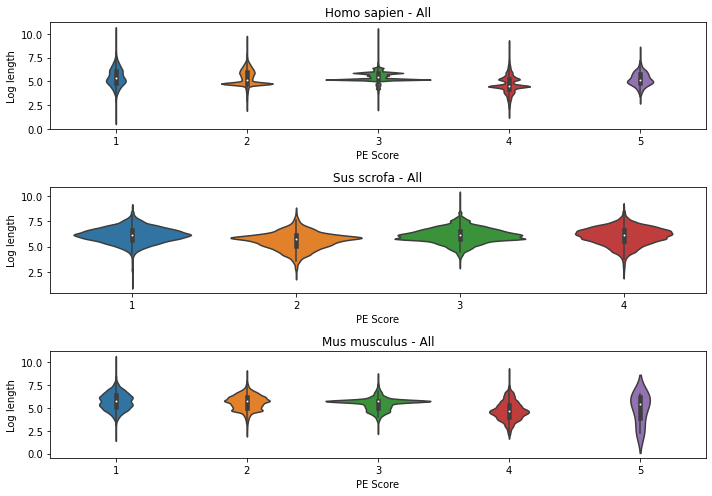

In [ ]:
fig=plt.figure(figsize=(10,7))
fig.tight_layout()
columns = 1
rows = 3

file_names = [None,'human_all_table_PE.csv', 'pig_all_table_PE.csv', 'mouse_all_table_PE.csv']
organisms = [None,'Homo sapien', 'Sus scrofa', 'Mus musculus']
for i in range(1,4):
    fig.add_subplot(rows, columns, i)
    table_all = pd.read_csv(file_names[i])
    create_violin_plot(table_all, organism = organisms[i])

fig.tight_layout()

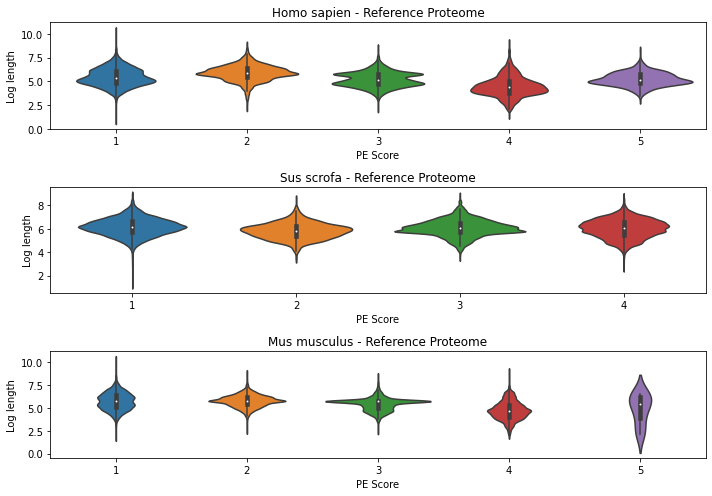

In [ ]:
#homo sapien, sus scrofa, mus musculus
fig=plt.figure(figsize=(10,7))
columns = 1
rows = 3

file_names = [None, 'human_proteome_table_PE.csv', 'pig_proteome_table_PE.csv', 'mouse_proteome_table_PE.csv']
organism_name = [None, 'Homo sapien', 'Sus scrofa', 'Mus musculus']

for i in range(1,4):
    fig.add_subplot(rows, columns, i)
    table_proteome = pd.read_csv(file_names[i])
    create_violin_plot(table_proteome, organism = organism_name[i], group = 'Reference Proteome')

fig.tight_layout()